# IBM Capstone Project- Car Accident Severity

## Introduction: Business Problem

In this project,we are studying collision data provided by seattle transportation.Due to the increase in collisions in the last couple of years it is a huge concern for the general public and the government.In order to control the rising number of collisions,it is utmost important to find the resolution for this.

Few of the questions which will be answered in this project are as follows:

•   Which section of the automobile should be focussed to improve safety in automobiles so that collision can be prevented?
•	What type of collisions are frequent and of what severity?
•	What and when the changes should be made in relation to infrastructure development?  
•	In what type of weather conditions maximum collisions have been recorded?
•	Were Speeding and weather variables contribute towards collision?
•	Which severity was at peak at different weather conditions?
•	What are the major reasons behind collision?


Solutions to these questions will be helpful for Target audience in order to strategise their next steps to generate revenue:-

•	Automobile companies

•	General Insurance companies 

•	Traffic/Transportation ministry

### Data Sources

We have data set from the Seatle Police department with a history of more than 15 years.
In an effort to reduce the frequency of car collisions in a community, an algorithm must be developed to predict the severity of an accident given the weather conditions, road and Junction type.

Independednt Variables:
i) Weather Conditions: A description of the weather conditions during the time of the collision 
ii) Road:The condition of the road during the collision
iii) Junction Type: Category of junction at which collision took place 

Target/Independent Variable: 
i) Severity Code: A code that corresponds to the severity of the collision:
    • 3—fatality
    • 2b—serious injury
    • 2—injury
    • 1—prop damage
    • 0—unknown

A model will be created that can predict severity based on independent variables. 


The data used for this study is provided by Coursera and can be found by clicking the following link:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

print('Reading csv completed')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading csv completed


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df["ROADCOND"].isna().sum()

5012

In [4]:
df.shape

(194673, 38)

In [4]:
df.columns


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [50]:
df.LOCATION.value_counts().head(10)

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          254
6TH AVE AND JAMES ST                                                                    252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          239
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                238
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   231
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    212
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              212
Name: LOCATION, dtype: int64

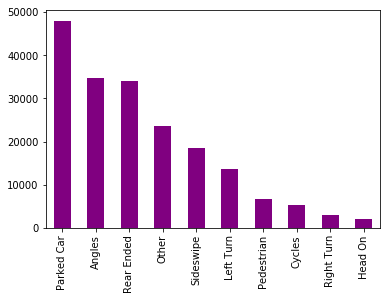

In [16]:
df9=df['COLLISIONTYPE'].value_counts().plot(kind='bar',color='purple')
df9

In [10]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [11]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [65]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

To find out top 5 types of collision 

In [3]:
df1=df['ST_COLCODE'].value_counts()

In [67]:
df1.head(10)

32    27612
10    23427
14    16883
32    16809
10    11247
50     9089
14     8888
11     8636
28     6925
13     5363
Name: ST_COLCODE, dtype: int64

In [13]:
print(df['SPEEDING'].shape)
df['SPEEDING'].value_counts()

(194673,)


Y    9333
Name: SPEEDING, dtype: int64

In [14]:
print(df['HITPARKEDCAR'].shape)
df['HITPARKEDCAR'].value_counts()

(194673,)


N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

During cleaning of dataset and finding out the impact of each attribute ,By above results we can say that involvement of parked cars were insignificant in collisions.Likely the attribute "SPEEDING" can be considered not very consequential as no. of accidents due to speeding are neglible as compared with those without speeding. 

In [4]:
df2=df.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','LOCATION','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'],axis=1)
df2

,SEVERITYCODE,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN
5,1,Intersection,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN
6,1,Intersection,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN
7,2,Intersection,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN
8,1,Block,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN
9,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN


In [5]:
df2.drop(['SPEEDING','SEVERITYCODE.1'],axis=1)

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight
4,2,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight
5,1,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight
6,1,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight
7,2,Intersection,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight
8,1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight
9,2,Intersection,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight


In [7]:
df2.drop(['SEVERITYCODE.1',"SPEEDING"],axis=1,inplace=True)
df2

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight
4,2,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight
5,1,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight
6,1,Intersection,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight
7,2,Intersection,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight
8,1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight
9,2,Intersection,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight


In [6]:
print(df2['UNDERINFL'].value_counts())
print(df2['INATTENTIONIND'].value_counts())

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
Y    29805
Name: INATTENTIONIND, dtype: int64


In [7]:
df2.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
SEVERITYCODE.1     int64
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
SDOT_COLDESC      object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object

In [22]:
df2.describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,2.444427,0.037139,0.028391,1.920780,13.867768
std,1.345929,0.198150,0.167413,0.631047,6.868755
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000,11.000000
50%,2.000000,0.000000,0.000000,2.000000,13.000000
75%,3.000000,0.000000,0.000000,2.000000,14.000000
max,81.000000,6.000000,2.000000,12.000000,69.000000


In [19]:
df2.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight
4,2,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight


In [24]:
df2["SEVERITYDESC"].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

So,There are only two categories of severity: Property damage only collision and injury collision.

### Methodology

In this project in order to analyse data for the factors which can impact accident rate we will find out which attribute is significant in contribution of various collisions. I will limit the analysis to certain highly contibuting factors only.

In first step we have collected the required data. In addition to this, I have identified that JunctionType,Weather and Road Conditions are the major contributors in collisions.Lots of Exploratory data anlysis has been involved in this case.

Second step involved finding correlation between independent variables and dependent variables individually and the results of the same has been shown with plots.Majorly bar chart has been used to show the correlation.Attributes with better correlation were focussed at subsequent steps later on.

In third and final step machine learning model will be made that can predict the severity of collision in the future.Different ML Models will be compared with each other.As the data type is categorical,classification method is used to make a ML model.Data was split into train set and test set for this purpose.Also categorical data was converted into numerical data as ML Models does not work with categories. Different classification ML Models Compared are: Decision tree, KNN,Logistic Regression, Support Vector Machine.The output will be presented and be used by stakeholders to curb collisions which are happening year on year.


In [8]:
df3=df2[['JUNCTIONTYPE','WEATHER','ROADCOND','SEVERITYCODE']]
df3

,JUNCTIONTYPE,WEATHER,ROADCOND,SEVERITYCODE
0,At Intersection (intersection related),Overcast,Wet,2
1,Mid-Block (not related to intersection),Raining,Wet,1
2,Mid-Block (not related to intersection),Overcast,Dry,1
3,Mid-Block (not related to intersection),Clear,Dry,1
4,At Intersection (intersection related),Raining,Wet,2
5,At Intersection (intersection related),Clear,Dry,1
6,At Intersection (intersection related),Raining,Wet,1
7,At Intersection (intersection related),Clear,Dry,2
8,Mid-Block (not related to intersection),Clear,Dry,1
9,At Intersection (intersection related),Clear,Dry,2


In [10]:
df3.dtypes

JUNCTIONTYPE    object
WEATHER         object
ROADCOND        object
SEVERITYCODE     int64
dtype: object

In [9]:
import seaborn as sns
%matplotlib inline

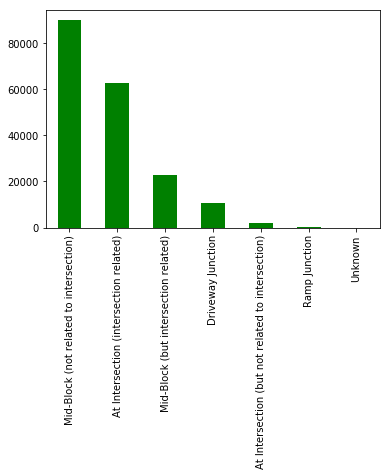

In [52]:
df3['JUNCTIONTYPE'].value_counts().plot(kind='bar',color='green')

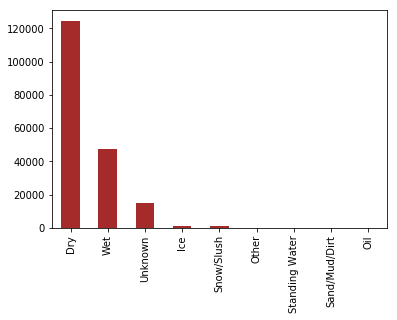

In [57]:
df3['ROADCOND'].value_counts().plot(kind='bar',color='brown')


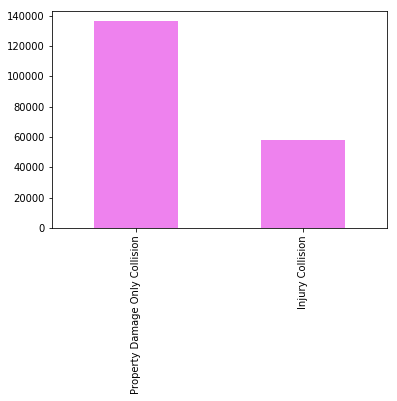

In [58]:
df3['SEVERITYDESC'].value_counts().plot(kind='bar',color='violet')

In [59]:
df5=df3.groupby(['SEVERITYDESC']).ROADCOND.value_counts()
df5

SEVERITYDESC                    ROADCOND      
Injury Collision                Dry               40064
                                Wet               15755
                                Unknown             749
                                Ice                 273
                                Snow/Slush          167
                                Other                43
                                Standing Water       30
                                Oil                  24
                                Sand/Mud/Dirt        23
Property Damage Only Collision  Dry               84446
                                Wet               31719
                                Unknown           14329
                                Ice                 936
                                Snow/Slush          837
                                Other                89
                                Standing Water       85
                                Sand/Mud/Dirt        52
 

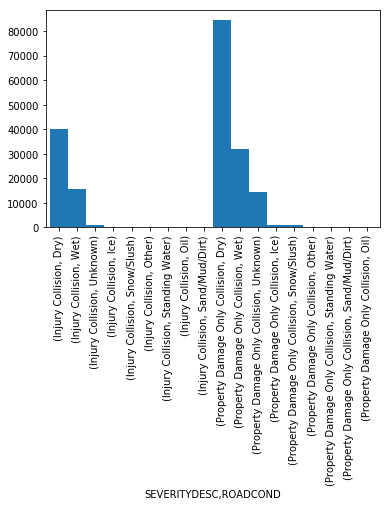

In [61]:
df5.plot(kind='bar',width=1)

In [64]:
df6=df3.groupby(['SEVERITYDESC']).WEATHER.value_counts()
df6

SEVERITYDESC                    WEATHER                 
Injury Collision                Clear                       35840
                                Raining                     11176
                                Overcast                     8745
                                Unknown                       816
                                Fog/Smog/Smoke                187
                                Snowing                       171
                                Other                         116
                                Sleet/Hail/Freezing Rain       28
                                Blowing Sand/Dirt              15
                                Severe Crosswind                7
                                Partly Cloudy                   3
Property Damage Only Collision  Clear                       75295
                                Raining                     21969
                                Overcast                    18969
                   

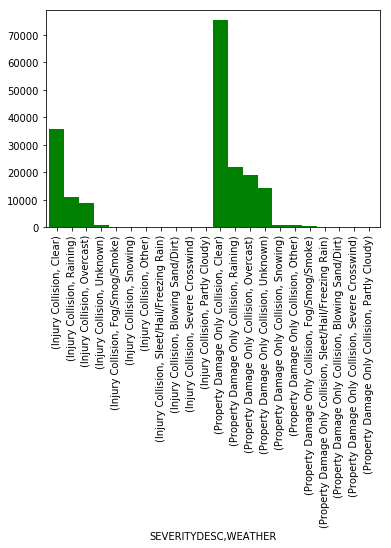

In [66]:
df6.plot(kind='bar',width=1,color='green')

In [67]:
df7=df3.groupby(['SEVERITYDESC']).JUNCTIONTYPE.value_counts()
df7


SEVERITYDESC                    JUNCTIONTYPE                                     
Injury Collision                At Intersection (intersection related)               27174
                                Mid-Block (not related to intersection)              19404
                                Mid-Block (but intersection related)                  7297
                                Driveway Junction                                     3234
                                At Intersection (but not related to intersection)      623
                                Ramp Junction                                           54
                                Unknown                                                  2
Property Damage Only Collision  Mid-Block (not related to intersection)              70396
                                At Intersection (intersection related)               35636
                                Mid-Block (but intersection related)                 15493
        

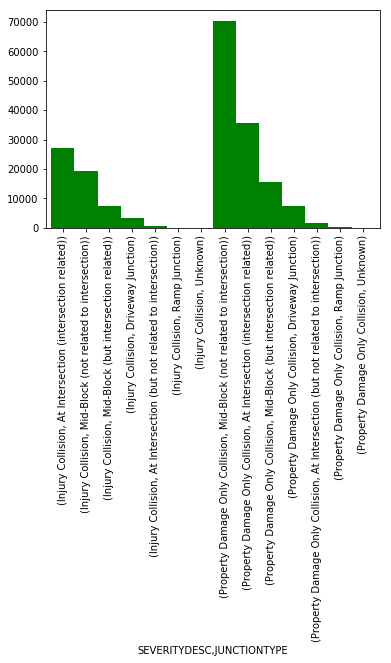

In [69]:
df7.plot(kind='bar',color='green',width=1)

In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [12]:
data = df3.fillna('',inplace=False)
data

,JUNCTIONTYPE,WEATHER,ROADCOND,SEVERITYCODE
0,At Intersection (intersection related),Overcast,Wet,2
1,Mid-Block (not related to intersection),Raining,Wet,1
2,Mid-Block (not related to intersection),Overcast,Dry,1
3,Mid-Block (not related to intersection),Clear,Dry,1
4,At Intersection (intersection related),Raining,Wet,2
5,At Intersection (intersection related),Clear,Dry,1
6,At Intersection (intersection related),Raining,Wet,1
7,At Intersection (intersection related),Clear,Dry,2
8,Mid-Block (not related to intersection),Clear,Dry,1
9,At Intersection (intersection related),Clear,Dry,2


## Predictive Modeling

In [13]:
X= data.iloc[:, :-1].values
X[0:5]

array([['At Intersection (intersection related)', 'Overcast', 'Wet'],
       ['Mid-Block (not related to intersection)', 'Raining', 'Wet'],
       ['Mid-Block (not related to intersection)', 'Overcast', 'Dry'],
       ['Mid-Block (not related to intersection)', 'Clear', 'Dry'],
       ['At Intersection (intersection related)', 'Raining', 'Wet']],
      dtype=object)

In [14]:
y = data.iloc[:, -1].values
y[0:5]

array([2, 1, 1, 1, 2])

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn import preprocessing
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0].astype(str))
X[:,1] = labelencoder_X.fit_transform(X[:,1].astype(str))
X[:,2] = labelencoder_X.fit_transform(X[:,2].astype(str))
X

array([[2, 5, 9],
       [5, 7, 9],
       [5, 5, 1],
       ...,
       [2, 2, 1],
       [2, 2, 1],
       [5, 2, 9]], dtype=object)

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.06281401,  0.35364615,  1.50545441],
       [ 0.92914878,  1.04520829,  1.50545441],
       [ 0.92914878,  0.35364615, -0.68713674],
       [ 0.92914878, -0.68369706, -0.68713674],
       [-1.06281401,  1.04520829,  1.50545441]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 3) (155738,)
Test set: (38935, 3) (38935,)


### KNN MODEL


In [39]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [41]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [21]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6584776997264636
Test set Accuracy:  0.6580197765506614


In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65801978, 0.69649416, 0.55356363, 0.70116861, 0.68565558,
       0.70430204, 0.69854886, 0.70407089, 0.67923462])

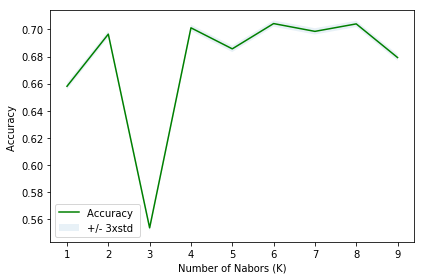

In [62]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [63]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7043020418646462 with k= 6


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
drugTree.fit(X_train,y_train)
X_train, X_test, y_train, y_test

(array([[ 0.26516119, -0.68369706, -0.68713674],
        [ 0.92914878,  0.35364615, -0.68713674],
        [ 0.26516119, -0.68369706, -0.68713674],
        ...,
        [-1.06281401, -0.68369706, -0.68713674],
        [ 0.92914878, -0.68369706, -0.68713674],
        [ 0.26516119,  1.04520829,  1.50545441]]),
 array([[ 0.92914878,  1.04520829,  1.50545441],
        [-1.06281401,  0.35364615,  1.50545441],
        [ 0.92914878,  0.35364615,  1.50545441],
        ...,
        [-0.39882641, -0.68369706, -0.68713674],
        [-2.3907892 ,  0.35364615, -0.68713674],
        [ 0.92914878,  1.04520829,  1.50545441]]),
 array([1, 1, 2, ..., 1, 1, 1]),
 array([2, 1, 1, ..., 1, 1, 2]))

In [44]:
predTree = drugTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[2 1 1 2 2]


In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7043790933607295


## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
LR_yhat = LR.predict(X_test)
LR_yhat

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.78593878, 0.21406122],
       [0.60252816, 0.39747184],
       [0.7368407 , 0.2631593 ],
       ...,
       [0.64906954, 0.35093046],
       [0.60057389, 0.39942611],
       [0.78593878, 0.21406122]])

In [49]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, LR_yhat)

0.7027610119429819

In [51]:
from sklearn.metrics import classification_report
print (classification_report(y_test, LR_yhat))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27425
           2       0.08      0.00      0.00     11510

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.39      0.50      0.41     38935
weighted avg       0.52      0.70      0.58     38935



In [52]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5909428070619929

## SVM Model

In [16]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=10,gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
SVM_yhat = clf.predict(X_test)
SVM_yhat 

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
y_train

array([1, 1, 2, ..., 1, 1, 1])

In [57]:
from sklearn.metrics import f1_score
f1_score(y_test, SVM_yhat, average='weighted') 
metrics.f1_score(y_test, SVM_yhat, average='weighted', labels=np.unique(SVM_yhat))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8265521398432791

In [58]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, SVM_yhat)

0.7043790933607295

In [59]:
predTree = drugTree.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test,predTree))
print("DT F1-score: %.2f" % f1_score(y_test, predTree, average='weighted') )

DT Jaccard index: 0.70
DT F1-score: 0.58


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
SVM_yhat = clf.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )


SVM Jaccard index: 0.70
SVM F1-score: 0.58


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
LR_yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))

LR Jaccard index: 0.70
LR F1-score: 0.58
LR LogLoss: 0.59


## Results

i)	70% of the collisions involve only property damage

ii)	44% of the collisions where only property was damaged  took place when road condition was dry whereas 22% of the total collisions where road condition involve severe injury and threat to life

iii)	35% of the total collisions involve majorly property damage and 27% of the total collisions include major injury as well and all this is when weather is clear

iv)	45% of the total collisions are at mid block (not related to intersection) whereas 35% of the total collisions are at intersection

v)	25% of the total accidents happened with parked cars whereas 30% of the total collisions are either at angles or at rear ends


## Discussion

i)	Property damage is most in all the collisions

ii)	Collisions are more in clear weather in comparison to when it is raining or overcast. This shows that people are more alert when they feel prone to accident due to bad weather 

iii)	Vehicles are collided on the higher side at angles and rear ends followed by parked cars collision 


## Conclusion

In this study, we have found various factors for the collision and how much each factor is significant. These results can be substantial for the target audience as follows:

i)	 Automobile companies can use the results to identify opportunity to develop vehicle technology to prevent collisions

ii)	Insurance companies can modify its underwriting rules and make changes in product norms or make exclusions on the basis of data of maximum collisions

iii)	Road Transport ministry can focus more on reasons of collision and importance of road maintenance 

By doing this, Companies and governments will be able to:

• To increase their sales revenue by building a more sophisticated and top notch in safety product 

• By reducing risk and claims as much as possible and earn more profits

• In order to show the better results to the general public by decreasing collision in no.s in coming years

